In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os

#from google.colab import drive
#drive.mount("/content/drive")

In [ ]:
directory = 'events'
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

train_files = csv_files[:12]
test_files = csv_files[12:17]

def load_data(files, directory):
    data = []
    for file in files:
        df = pd.read_csv(os.path.join(directory, file))
        data.append(df)
    return pd.concat(data, ignore_index=True)

train_data = load_data(train_files, directory)
test_data = load_data(test_files, directory)
print(train_data)
print(test_data)

train_data['sample_weight'] = train_data['w_depth'].apply(lambda x: 1 if x < 0.2 else 2)
sample_weight = train_data['sample_weight']

X_train = train_data.drop(columns=['w_depth', 'FID_', 'FULLNAME',  'DateTime','sample_weight'])
y_train = train_data['w_depth']
X_test = test_data.drop(columns=['w_depth', 'FID_', 'FULLNAME', 'DateTime'])
y_test = test_data['w_depth']


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

          FID_             FULLNAME   RH     DateTime  MAX15      HR_2  \
0            0  E LITTLE CREEK ROAD  0.0  Jun16_05_01    0.0  0.000000   
1            1  E LITTLE CREEK ROAD  0.0  Jun16_05_01    0.0  0.000000   
2            2  E LITTLE CREEK ROAD  0.0  Jun16_05_01    0.0  0.000000   
3            3  E LITTLE CREEK ROAD  0.0  Jun16_05_01    0.0  0.000000   
4            4  E LITTLE CREEK ROAD  0.0  Jun16_05_01    0.0  0.000000   
...        ...                  ...  ...          ...    ...       ...   
6493120  17497       CHILDRENS LANE  0.0  May18_06_23    0.0  0.002941   
6493121  17498       CHILDRENS LANE  0.0  May18_06_23    0.0  0.002891   
6493122  17499       FAIRFAX AVENUE  0.0  May18_06_23    0.0  0.003018   
6493123  17500       FAIRFAX AVENUE  0.0  May18_06_23    0.0  0.003077   
6493124  17501          WOOD STREET  0.0  May18_06_23    0.0  0.006269   

            HR_72  w_depth  TD_HR       ELV          DTW       TWI  
0        0.000000   0.0000 -0.126  3.44965

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,       # Number of trees
    #max_depth=40,          # Limit tree depth
    # max_features=5,       # Feature limit per split (commented as you haven't set it)
    # min_samples_split=2,  # Min samples per split (commented as default is 2)
    # min_samples_leaf=1,   # Min samples per leaf (commented as default is 1)
    # max_samples=0.8,      # Fraction of data for each tree (if applicable)
    random_state=42,
    n_jobs=-1              # Set to -1 to use all available CPU cores
)

rf_model.fit(X_train_scaled, y_train, sample_weight=sample_weight)

y_pred_rf_train = rf_model.predict(X_train_scaled)
y_pred_rf_test = rf_model.predict(X_test_scaled)



rf_train_r2 = r2_score(y_train, y_pred_rf_train)
rf_test_r2 = r2_score(y_test, y_pred_rf_test)


print(f'Random Forest - Training R^2: {rf_train_r2}')
print(f'Random Forest - Testing R^2: {rf_test_r2}')


MemoryError: could not allocate 234881024 bytes

In [25]:
y_pred_rf_train = rf_model.predict(X_train_scaled)
y_pred_rf_test = rf_model.predict(X_test_scaled)



rf_train_r2 = r2_score(y_train, y_pred_rf_train)
rf_test_r2 = r2_score(y_test, y_pred_rf_test)


print(f'Random Forest - Training R^2: {rf_train_r2}')
print(f'Random Forest - Testing R^2: {rf_test_r2}')

Random Forest - Training R^2: 0.8040501864972895
Random Forest - Testing R^2: 0.8030959749765245


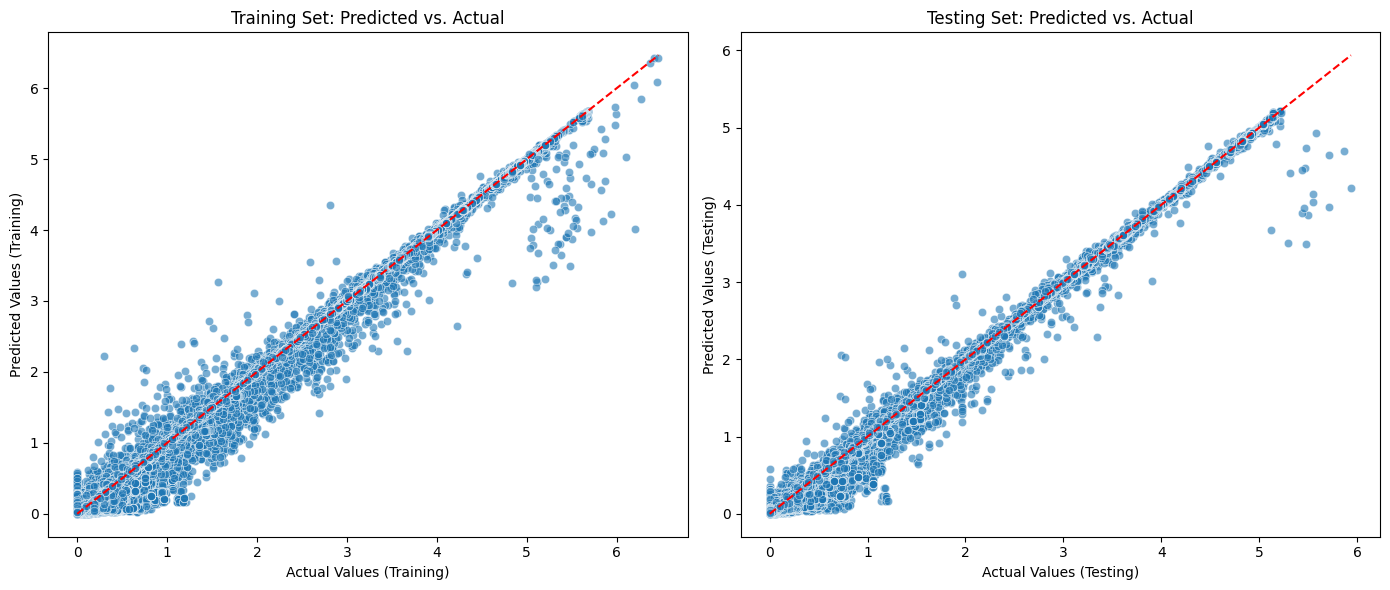

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_pred_rf_train, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # Reference line
plt.xlabel('Actual Values (Training)')
plt.ylabel('Predicted Values (Training)')
plt.title('Training Set: Predicted vs. Actual')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
plt.xlabel('Actual Values (Testing)')
plt.ylabel('Predicted Values (Testing)')
plt.title('Testing Set: Predicted vs. Actual')

plt.tight_layout()
plt.show()


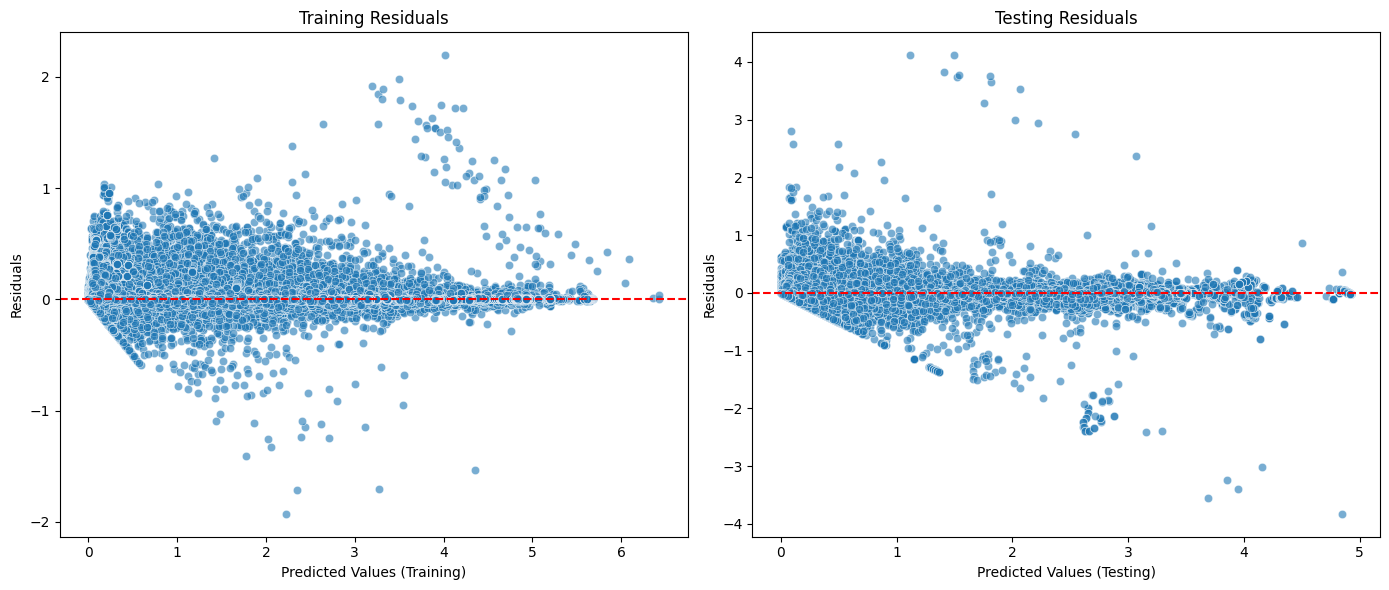

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

train_residuals = y_train - y_pred_rf_train
test_residuals = y_test - y_pred_rf_test

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_rf_train, y=train_residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values (Training)')
plt.ylabel('Residuals')
plt.title('Training Residuals')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred_rf_test, y=test_residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values (Testing)')
plt.ylabel('Residuals')
plt.title('Testing Residuals')

plt.tight_layout()
plt.show()


   FID_             FULLNAME   RH     DateTime  MAX15  HR_2  HR_72  w_depth  \
0     0  E LITTLE CREEK ROAD  0.0  Sep16_19_10    0.0   0.0    0.0      0.0   
1     1  E LITTLE CREEK ROAD  0.0  Sep16_19_10    0.0   0.0    0.0      0.0   
2     2  E LITTLE CREEK ROAD  0.0  Sep16_19_10    0.0   0.0    0.0      0.0   
3     3  E LITTLE CREEK ROAD  0.0  Sep16_19_10    0.0   0.0    0.0      0.0   
4     4  E LITTLE CREEK ROAD  0.0  Sep16_19_10    0.0   0.0    0.0      0.0   

   TD_HR       ELV          DTW       TWI  
0   0.61  3.449655  2032.268709  7.511351  
1   0.61  3.351578  2289.101516  7.397089  
2   0.61  3.355286  2170.271564  7.548316  
3   0.61  3.489952  2261.629379  8.816202  
4   0.61  3.421316  2262.551560  9.006661  


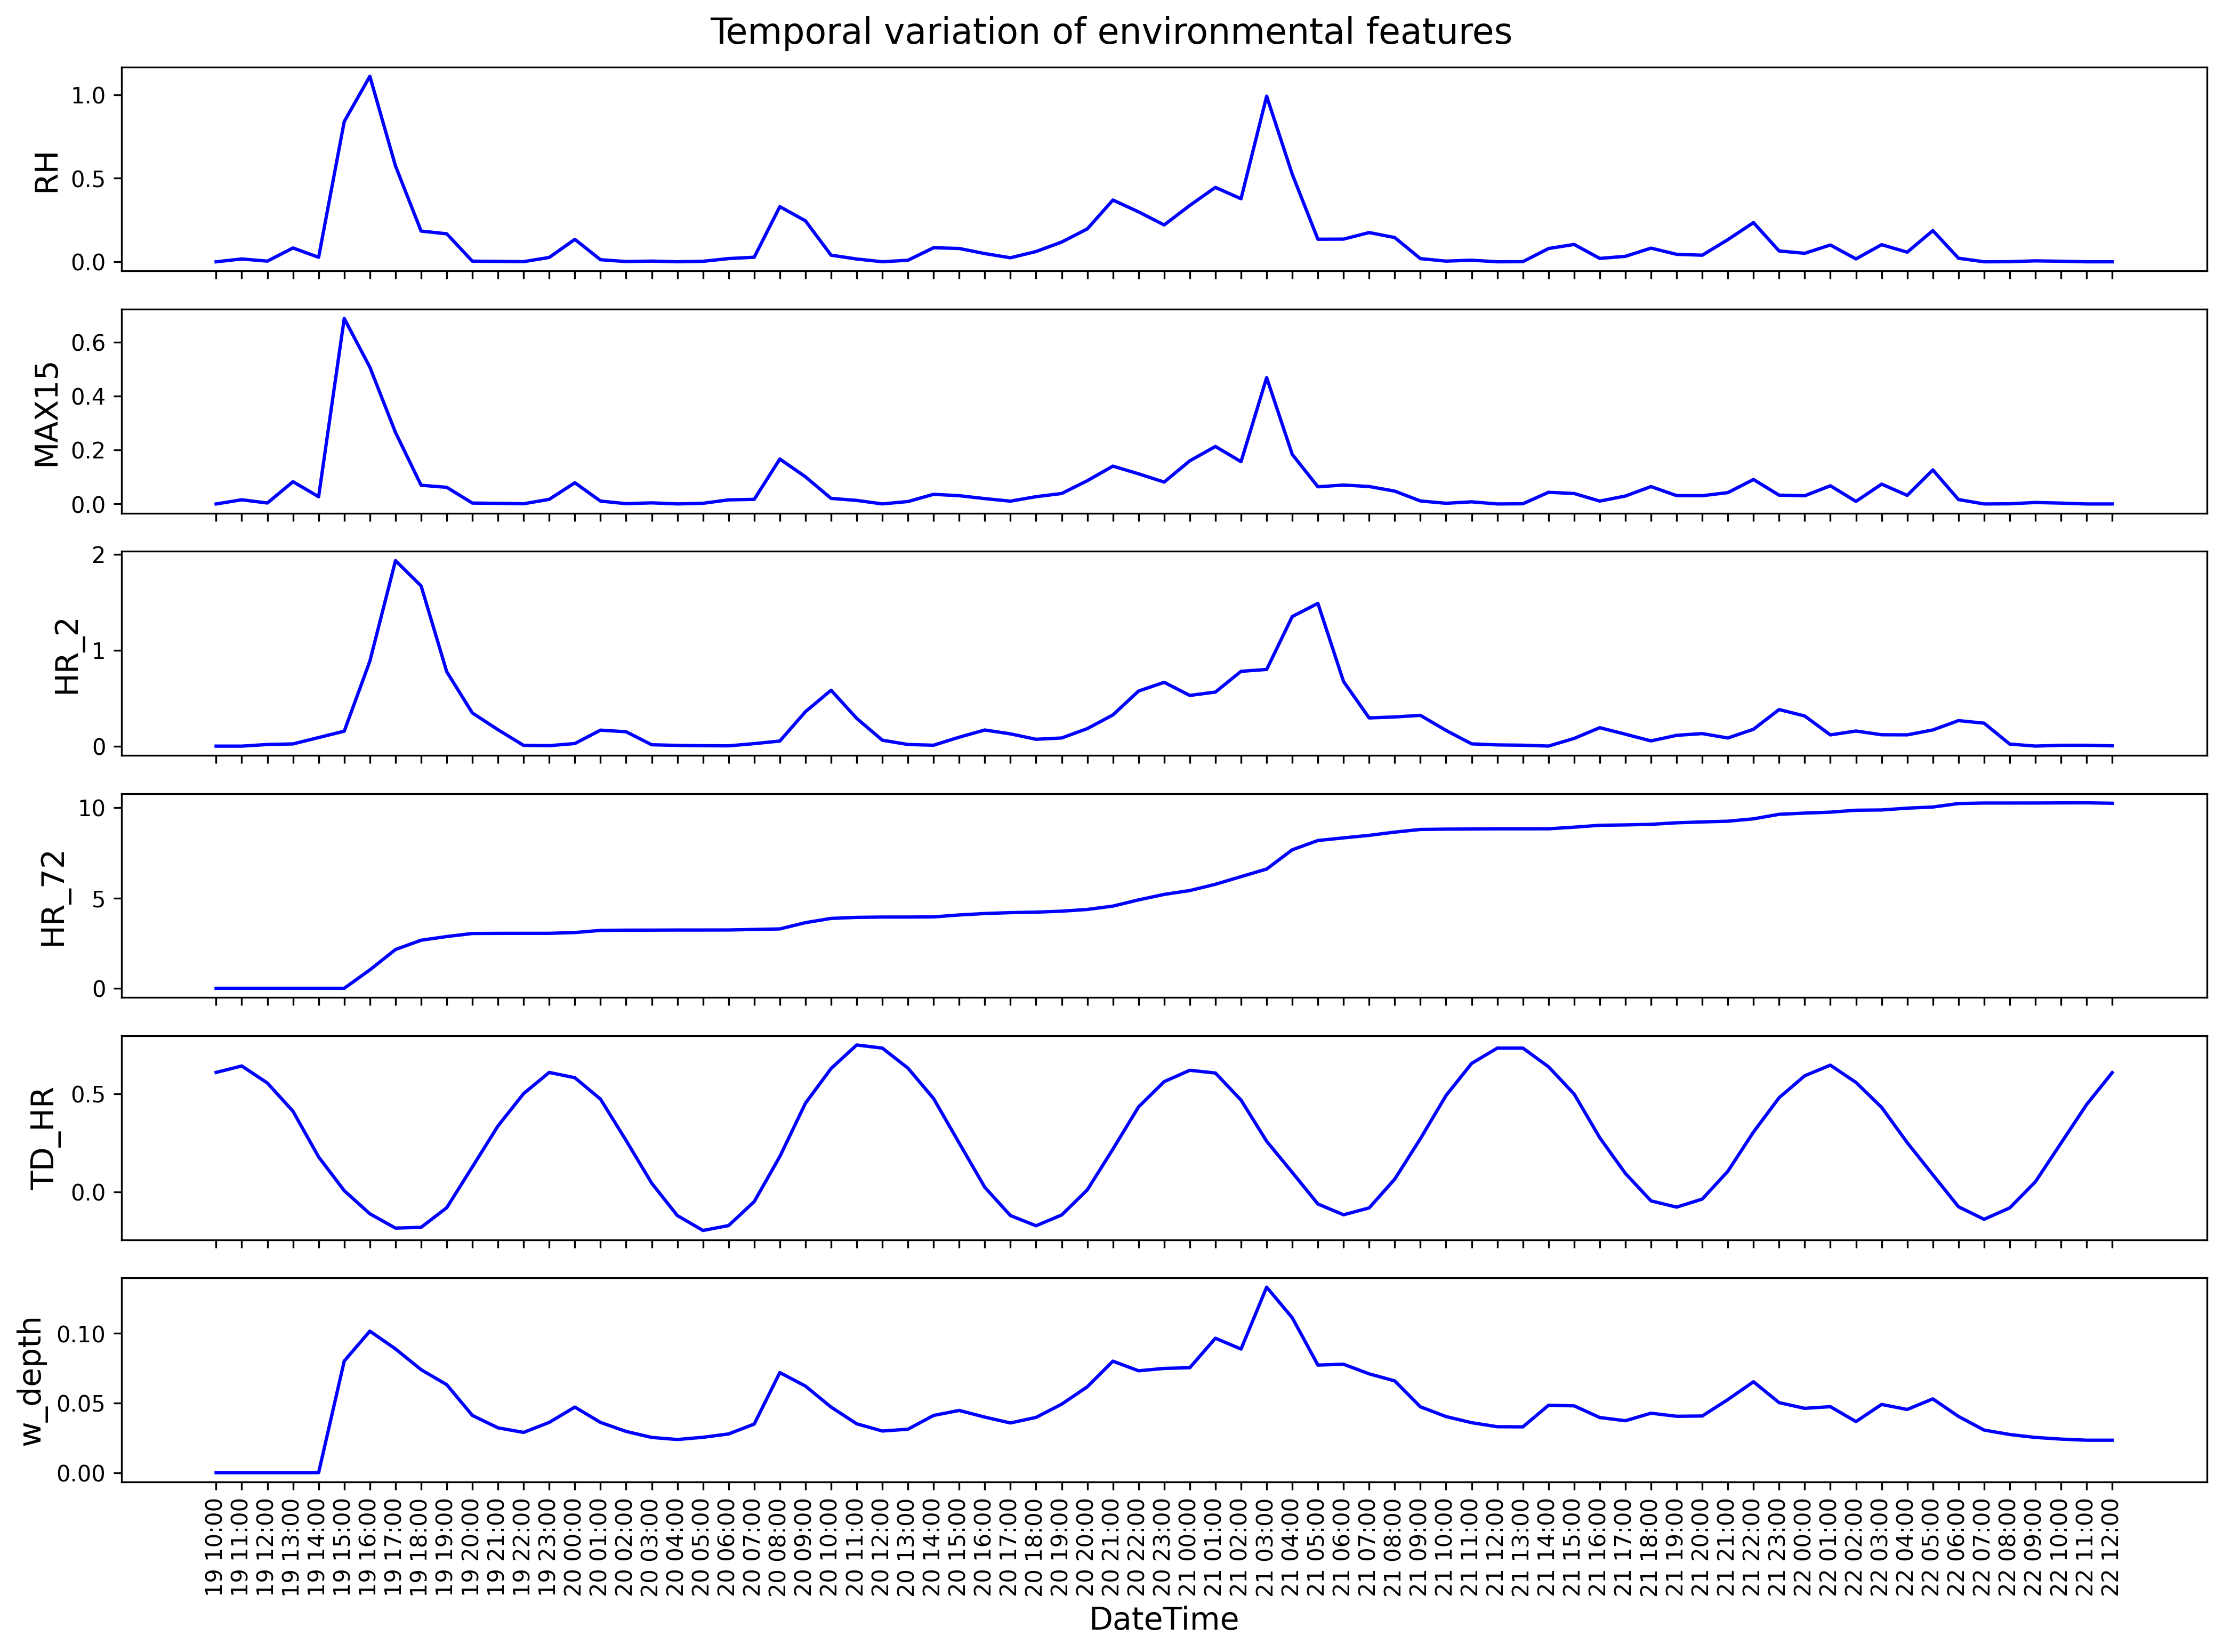

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
path = 'events/2016_09_21.csv'
df = pd.read_csv(path)

print(df.head())


df['DateTime'] = df['DateTime'].apply(lambda x: x.split('_')[1] + ' ' + x.split('_')[2] + ':00')

df['DateTime1'] = pd.to_datetime(df['DateTime'], format='%d %H:%M')

numeric_cols = [ 'RH', 'MAX15', 'HR_2', 'HR_72', 'TD_HR' , 'w_depth']
df_numeric = df[['DateTime'] + numeric_cols]

df_median = df_numeric.groupby('DateTime').median()

fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(14, 10), sharex=True, dpi=300)

for i, feature in enumerate(numeric_cols):
    axes[i].plot(df_median.index, df_median[feature], label=feature, color='b')
    #axes[i].set_title(f'{feature} over Time')
    axes[i].set_ylabel(feature, fontsize=14)
    #axes[i].legend()

axes[-1].set_xlabel('DateTime', fontsize=14)

fig.suptitle('Temporal variation of environmental features', fontsize=16)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(df)

X_test1 = df.drop(columns=['w_depth', 'FID_', 'FULLNAME', 'DateTime', 'DateTime1' ])
y_test1 = df['w_depth']

print(X_test1, y_test1)


directory = 'events'
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

train_files = csv_files[:12]
test_files = csv_files[12:17]

def load_data(files, directory):
    data = []
    for file in files:
        df = pd.read_csv(os.path.join(directory, file))
        data.append(df)
    return pd.concat(data, ignore_index=True)

train_data = load_data(train_files, directory)
test_data = load_data(test_files, directory)
print(train_data)
print(test_data)

train_data['sample_weight'] = train_data['w_depth'].apply(lambda x: 1 if x < 0.2 else 2)
sample_weight = train_data['sample_weight']

X_train = train_data.drop(columns=['w_depth', 'FID_', 'FULLNAME',  'DateTime','sample_weight'])
y_train = train_data['w_depth']



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test1)

y_pred = rf_model.predict(X_test_scaled)




          FID_             FULLNAME   RH  DateTime  MAX15      HR_2  \
0            0  E LITTLE CREEK ROAD  0.0  19 10:00    0.0  0.000000   
1            1  E LITTLE CREEK ROAD  0.0  19 10:00    0.0  0.000000   
2            2  E LITTLE CREEK ROAD  0.0  19 10:00    0.0  0.000000   
3            3  E LITTLE CREEK ROAD  0.0  19 10:00    0.0  0.000000   
4            4  E LITTLE CREEK ROAD  0.0  19 10:00    0.0  0.000000   
...        ...                  ...  ...       ...    ...       ...   
1298620  17497       CHILDRENS LANE  0.0  22 12:00    0.0  0.002448   
1298621  17498       CHILDRENS LANE  0.0  22 12:00    0.0  0.002477   
1298622  17499       FAIRFAX AVENUE  0.0  22 12:00    0.0  0.002444   
1298623  17500       FAIRFAX AVENUE  0.0  22 12:00    0.0  0.002456   
1298624  17501          WOOD STREET  0.0  22 12:00    0.0  0.001850   

             HR_72  w_depth  TD_HR       ELV          DTW       TWI  \
0         0.000000   0.0000  0.610  3.449655  2032.268709  7.511351   
1    

In [19]:
df['y_pred']= y_pred

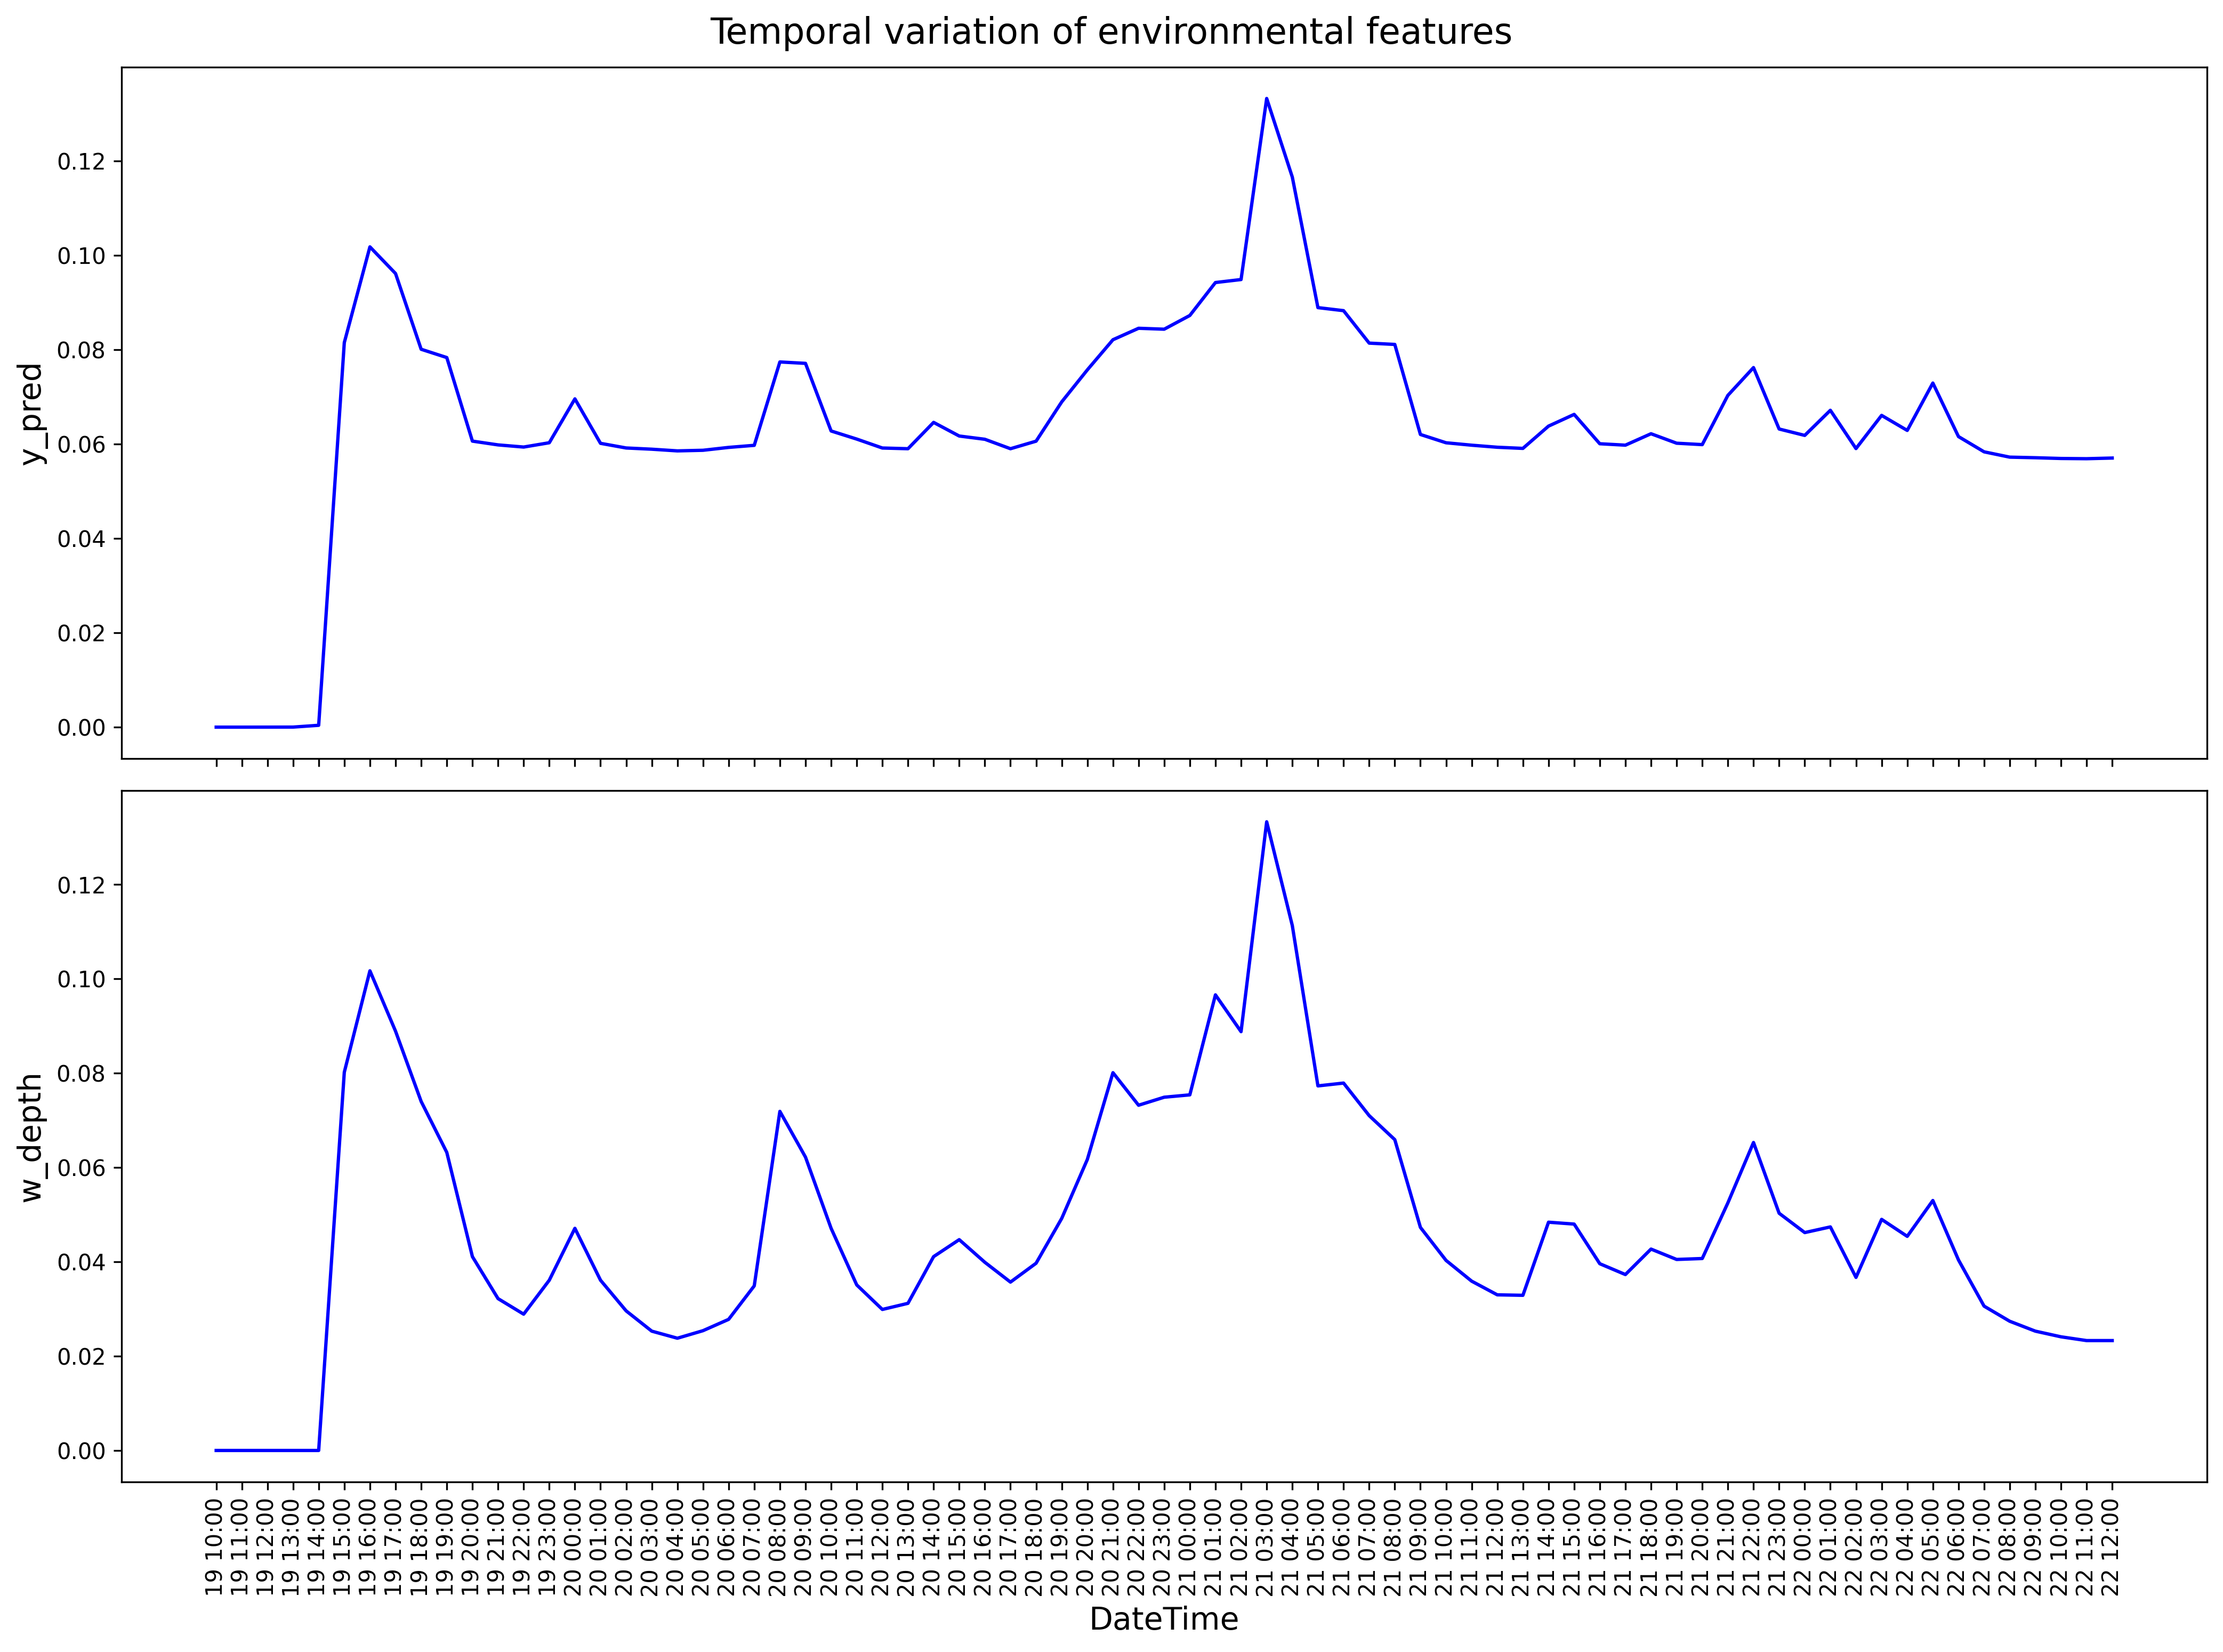

In [ ]:
numeric_cols = [ 'y_pred' , 'w_depth']
df_numeric = df[['DateTime'] + numeric_cols]

df_median = df_numeric.groupby('DateTime').median()

fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(14, 10), sharex=True, dpi=300)

for i, feature in enumerate(numeric_cols):
    axes[i].plot(df_median.index, df_median[feature], label=feature, color='b')
    #axes[i].set_title(f'{feature} over Time')
    axes[i].set_ylabel(feature, fontsize=14)
    #axes[i].legend()

axes[-1].set_xlabel('DateTime', fontsize=14)

fig.suptitle('Temporal variation of environmental features', fontsize=16)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()